In [1]:
from scipy import special, integrate, real, imag
import numpy as np
import matplotlib.pyplot as plt

In [5]:
hcrsc = 197.326968 # MeV Fm
finealpha = 1/137.0
def getradius(mass):
    return 1.236*(mass)**(1/3)

def NgammaE1(Egamma, vi, Zt, bmin, a0):
    
    gammarel = (1.0 - vi**2)**(-0.5)     
    print("gammarel", gammarel)
    xi = ( Egamma/(hcrsc*gammarel*vi) ) * (bmin+0.000001 + np.pi * a0 / (2 * gammarel))
    
    #print(xi)
    NE1 = ( (2*finealpha*Zt**2*vi**2)/(np.pi) ) * (xi*special.kn(0, xi)*special.kn(1, xi) - (vi*xi)**2/2*(special.kn(1, xi)**2 - special.kn(0,xi)**2))
    return NE1

m = 931.5*np.array([19, 18, 1, 208]) # a, b, c and t MeV/c^2
z = np.array([6, 6, 0, 82]) # a, b, c and t

bmin = getradius(m[0]) + getradius(m[3])

print(bmin)

beamE = 67 #MeV/amu

BE_bc = 0.53 #MeV

Ebc = 0.01*np.arange(1, 410, 1, dtype='double')

mu_ax = m[0]*m[3]/(m[0] + m[3])
mu_bc = m[1]*m[2]/(m[1] + m[2])
srel = (m[0]**2.0 + m[3]**2.0) + 2.0*m[3]*beamE*m[0]
Eax = np.sqrt(srel) - m[0] - m[3] + mu_ax
Pax = np.sqrt(Eax**2 - mu_ax**2)
vi = Pax/Eax

mA = m[0] + Ebc
mu_Ax = mA*m[3]/(mA + m[3])
EAx = np.sqrt(srel) - mA - m[3] + mu_ax
PAx = np.sqrt(EAx**2 - mu_Ax**2)
vf = PAx/EAx

vsymm = np.sqrt(vi*vf)

Egamma = BE_bc + Ebc

a0 = z[0]*z[3]/(mu_ax * vsymm**2)

NE1 = NgammaE1(Egamma, vsymm, z[3], bmin, a0)

# plt.plot(Egamma, NE1)
# plt.show()

np.set_printoptions(precision=8)
# print(Ebc)



103.73153485608148
gammarel [31.44826815 31.4482597  31.44825125 31.44824281 31.44823436 31.44822591
 31.44821746 31.44820901 31.44820056 31.44819211 31.44818366 31.44817521
 31.44816676 31.44815831 31.44814987 31.44814142 31.44813297 31.44812452
 31.44811607 31.44810762 31.44809917 31.44809072 31.44808227 31.44807382
 31.44806537 31.44805693 31.44804848 31.44804003 31.44803158 31.44802313
 31.44801468 31.44800623 31.44799778 31.44798933 31.44798088 31.44797244
 31.44796399 31.44795554 31.44794709 31.44793864 31.44793019 31.44792174
 31.44791329 31.44790484 31.44789639 31.44788795 31.4478795  31.44787105
 31.4478626  31.44785415 31.4478457  31.44783725 31.4478288  31.44782035
 31.4478119  31.44780346 31.44779501 31.44778656 31.44777811 31.44776966
 31.44776121 31.44775276 31.44774431 31.44773586 31.44772741 31.44771897
 31.44771052 31.44770207 31.44769362 31.44768517 31.44767672 31.44766827
 31.44765982 31.44765137 31.44764293 31.44763448 31.44762603 31.44761758
 31.44760913 31.4476006

In [3]:
# x = np.linspace(-1.0, 1.0, 1000)
# plt.plot(x, x*special.kn(0,x)*special.kn(1, x))
# plt.show()
# #print(x)

with open('nccapnr.in') as f:
    inp = f.readlines()
for i, line in enumerate(inp):
    if(i==0):
        ma, mt, mb, mc = [float(x) for x in line.split()]
    if(i==1):
        za, zt, zb, zc, Eau = [float(x) for x in line.split()]
    if(i==2):
        ja, jb, jc = [float(x) for x in line.split()]
    if(i==3):
        S_n, = [float(x) for x in line.split()]
    if(i==4):
        Elow, Ehigh, Einc = [float(x) for x in line.split()]


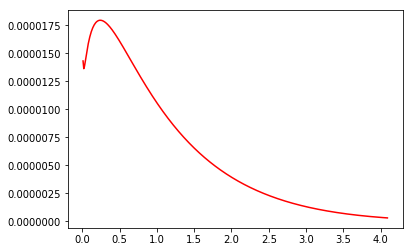

In [4]:
Erel = list()
dsig = list()
i = 0

with open('cdcrs_2.6.dat') as f:
    inp = f.readlines()

for line in inp:
    x, y = [float(i) for i in line.split()]
    Erel.append(x)
    dsig.append(y)
# print(len(dsig))
# plt.xlim(0, 4)
# plt.ylim(2, 5)
# plt.plot(Erel, dsig, 'r-')
# plt.show()

# print(NE1)

sig_photo = Egamma*dsig/NE1 # kink disappears if Ebc instead of Egamma

kgamma = Egamma/hcrsc
kbc = np.sqrt(2.0*mu_bc*Ebc)/hcrsc
sig_cap = sig_photo*2*(2*ja + 1)*kgamma**2/((2*jb + 1)*(2*jc + 1)*kbc**2)

plt.plot(Ebc, sig_cap, 'r-')
plt.show()



In [5]:
BE_bc = 0.53
li = 0
lf = 1
Z = 6
A = 19
Zeff = -Z/A

def clfgordn(l1, l2, ml1, ml2, j, mj):
    pass

def hankel(n, r, BE_bc):
    a = np.sqrt(2.0*mu_bc*BE_bc)/(hcrsc)
    z = i(a*r)
    h = special.spherical_jn(n, z) + 1j*special.spherical_yn(n, z)
    return h

def phi_b(r, BE_bc):
    a = np.sqrt(2.0*mu_bc*BE_bc)/(hcrsc)
    Nb = np.sqrt(2*a**3)
    return Nb*(-np.exp(-a*r)/a*r)

def phi_c(r, Ec):
    k = np.sqrt(2.0*mu_bc*Ec)/(hcrsc)
    return np.sqrt(2.0*mu_bc*k/(hcrsc**2*np.pi)) * (np.sin(k*r)/((k*r)**2) - np.cos(k*r)/(k*r))


def quad_eval(BE_bc, Ec):
    # Evaluate quad integration
    # BE_bc and Ec are SCALARS
    # -------------------------
    a = np.sqrt(2.0*mu_bc*BE_bc)/(hcrsc)
    k = np.sqrt(2.0*mu_bc*Ec)/(hcrsc)
    def integrand(r):
        const1 = np.sqrt(2.0*mu_bc*k/(np.pi * hcrsc**2))
        const2 = np.sqrt(2*a**3) # Nb
        f = const1 * const2 * ( r*np.cos(k*r)/k - np.sin(k*r)/(k**2) ) * (np.exp(-a*r)/a)
        return f

    #     print("Ec is, ", Ec)
    real_intg = integrate.quad(integrand, 0, np.inf)
    dBdE = (0.75 * Zeff**2 / np.pi) * np.absolute(real_intg[0])**2

    return dBdE

def calc_Ec_intg(BE):
    
    def integrand(Ec):
        f = quad_eval(BE, Ec)
        return f
    
    real_intg = integrate.quad(integrand, 0.001, 2)
    BE1 = real_intg[0]
    
    return BE1
        

def calc_diff_TP(BE, Ec_arr):
    dBdE_arr = np.array([])
    for E in Ec_arr:
        dBdE_arr = np.append(dBdE_arr, quad_eval(BE, E))
    return dBdE_arr
    
def calc_TP(BE_arr, Ec_arr):
    # Calculate Transition probability, B(E1)
    # -----------------------------------------------------
    # print(Econti)
        
    BE1 = np.array([])   #array of BindingE values

    for be in BE_arr:
        
        #METHOD 1
#         dBdE_arr = calc_diff_TP(be, Ec_arr)
#         y = integrate.simps(dBdE_arr, be+Ec_arr)
        #METHOD 2
        y = calc_Ec_intg(be)
        BE1 = np.append(BE1, y)
    #print("Binding Energ:- ", BE_bc)
    
    plt.plot(BE_arr, BE1)
    plt.show()
    

#------------------------------------------------------------------------------
# def integrand(r, Ec):
#     a = np.sqrt(2.0*mu_bc*BE_bc)/(hcrsc**2.0)
#     phi_b = hankel(li, 1j*a*r)
#     k = np.sqrt(2.0*mu_bc*Ec)/(hcrsc**2.0)
#     phi_c = np.sqrt(2.0*mu_bc*k/(hcrsc**2*np.pi))*special.spherical_jn(lf, k*r)
    
#     f = phi_b*phi_c*r**3.0
    
#     return f


    
# def complex_quadrature(func, a, b, *args, **kwargs):
#     def real_func(x):
#         return np.real(func(x, *args))
#     def imag_func(x):
#         return np.imag(func(x, *args))
#     real_integral = integrate.quad(real_func, a, b, **kwargs)
#     imag_integral = integrate.quad(imag_func, a, b, **kwargs)
#     return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
# #     mod = np.sqrt(real_integral[0]**2 + imag_integral[0]**2)
    
# #     return mod
# complex_quadrature(integrand, 0, 100, Ec)

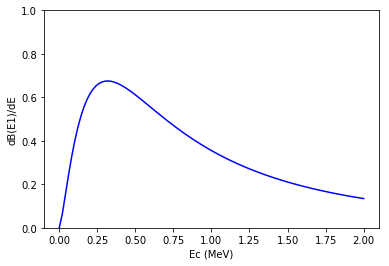

In [6]:
Ec = np.linspace(0.001,2,100)
y = calc_diff_TP(0.53,Ec)
plt.ylim([0, 1])
plt.plot(Ec, y, 'b-')
plt.xlabel('Ec (MeV)')
plt.ylabel('dB(E1)/dE')
plt.show()
 # Correction factor of the order 2

In [7]:
BEarr = np.linspace(0.09, 1.5, 50)
# y = calc_TP(BEarr, Ec)

# print(BEarr)
y = list()
for e in BEarr:
    out = calc_Ec_intg(e)
    y.append(out)
y = np.array(y)

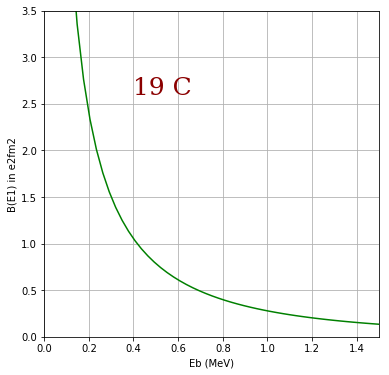

In [8]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25
        }

plt.figure(figsize=(6,6))
plt.ylim([0, 3.5])
plt.xlim([0, 1.5])
plt.xlabel('Eb (MeV)')
plt.ylabel('B(E1) in e2fm2')
plt.plot(BEarr, y, 'g-')
plt.grid('on')
plt.text(0.4, 2.6, '19 C', fontdict=font)
plt.show()

In [9]:
def db(BE_bc, Ec, li, lf):
    
    # THIS IS USING ANALYTICAL FORMULAS

#     print(av)



#     const = 2.5 * Zeff**2 * 3 * hcrsc**2/(np.pi**2 * mu_bc)
#     fac = np.sqrt(BE_bc) * Ec**(3/2) / (Ec + BE_bc)**4
#     ret = const * fac    k = np.sqrt(2.0*mu_bc*Ec)/hcrsc
    a = np.sqrt(2.0*mu_bc*BE_bc)/hcrsc
    k = np.sqrt(2.0*mu_bc*Ec)/(hcrsc)
    ai = (li+lf+4)/2
    b = (lf-li+3)/2
    c = lf+3/2
    z = -k**2/a**2
    Zeff = 6/19
    
    gammafactor = special.gamma(ai)*special.gamma(b)/special.gamma(c)
    const = 2.0 * np.sqrt(2 * a**3) * ( k**(lf+0.5) / a**(lf+4) )
    
    ret = const*gammafactor*special.hyp2f1(ai,b,c,z)
    ret = (0.75 / np.pi) * Zeff**2 * ret**2.0
#     print(mu_bc)
    return ret
    

In [12]:
Ec = np.linspace(0.001, 4, 1000)
li = 0
lf = 1
y_diff = db(0.53, Ec, li, lf)
y_diff2 = calc_diff_TP(0.53,Ec)

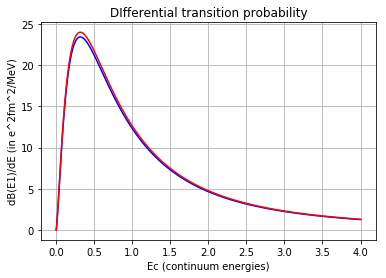

In [13]:
plt.plot(Ec, y_diff, 'b-', Ec, y_diff2*35.5, 'r-')
plt.title("DIfferential transition probability")
plt.xlabel("Ec (continuum energies)")
plt.ylabel("dB(E1)/dE (in e^2fm^2/MeV)")
plt.grid('on')
plt.show()

In [14]:
def radcap(Ebc, BE_bc, dBdE):
    
    Egamma = Ebc + BE_bc
    
    kgamma = Egamma/hcrsc
    kbc = np.sqrt(2.0*mu_bc*Ebc)/hcrsc
    
    sig_photo = 2 * (2*np.pi)**3 * (kgamma) * dBdE / (9)

    sig_cap = sig_photo*2*(2*ja + 1)*kgamma**2/((2*jb + 1)*(2*jc + 1)*kbc**2)
    
    return sig_cap
    

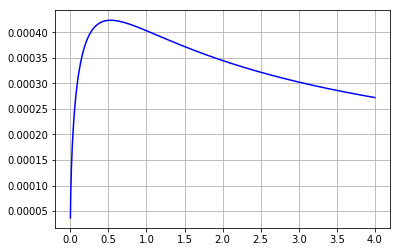

In [15]:
yplot = radcap(Ec, 0.53, y_diff2)
plt.plot(Ec, yplot, 'b-')
plt.grid('on')
plt.show()

In [ ]:
np.arange(0,2 ,0.001)

In [17]:
special.hyp2f1(-1, -8, -16, 2.0)

nan

In [16]:
import scipy
scipy.__version__

'1.0.1'

In [ ]:
phi_b(0, 0.53)

In [ ]:
r = np.linspace(0, 1, 100)
h = hankel(1, r)